In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import numpy.random as npr
import scipy


1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

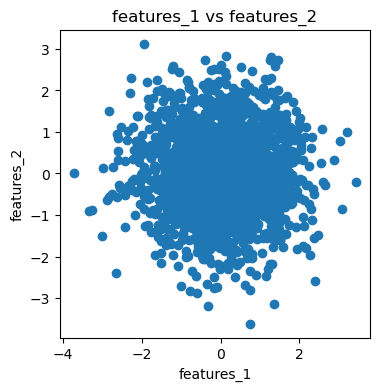

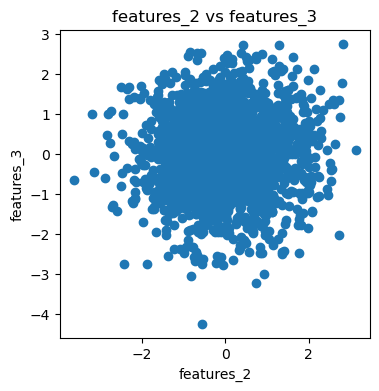

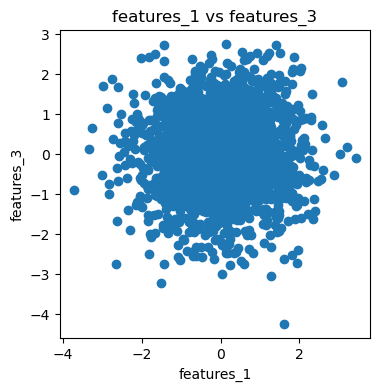

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/regression_generated.csv')

X = df.features_1
Y = df.features_2
Z = df.features_3

fig1 = plt.figure(num="Figure 1", figsize=(4, 4))
plt.scatter(X, Y)
plt.title('features_1 vs features_2')
plt.xlabel("features_1")
plt.ylabel("features_2")
plt.show()

fig2 = plt.figure(num="Figure 2", figsize=(4, 4))
plt.scatter(Y, Z)
plt.title('features_2 vs features_3')
plt.xlabel("features_2")
plt.ylabel("features_3")
plt.show()

fig3 = plt.figure(num="Figure 3", figsize=(4, 4))
plt.scatter(X, Z)
plt.title('features_1 vs features_3')
plt.xlabel("features_1")
plt.ylabel("features_3")
plt.show()

#I can't see any correlation in neither of the three

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

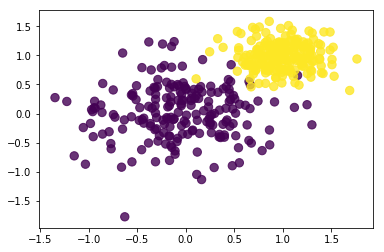

In [1]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

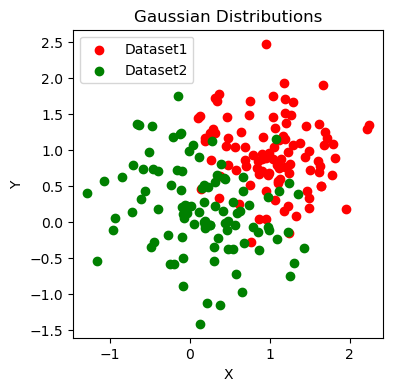

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import numpy.random as npr
import scipy

def generate_gaussian_dataset(n1,n2, mean1,sd1, mean2,sd2):
    data1 = pd.DataFrame(np.random.normal(loc=mean1,scale=sd1,size =(nsamples1,2)), columns = ('feature_1','feature_2'))
    data2 = pd.DataFrame(np.random.normal(loc=mean2,scale=sd2,size =(nsamples2,2)), columns = ('feature_1','feature_2'))
    data1['category'] = pd.Series(np.ones(n1))
    data2['category'] = pd.Series(2*np.ones(n2))
    data = pd.concat([data1,data2])
    return data

(n1,n2,mean1,mean2,sd1,sd2) =(100,100,1,0.1,0.5,0.6)
data = generate_gaussian_dataset(n1,n2,mean1,sd1,mean2,sd2)
data

fig= plt.figure(num="Figure 4", figsize=(4, 4))

plt.scatter(x = data[data['category']==1].loc[:,'feature_1'], y = data[data['category']==1].loc[:,'feature_2'], c='r',label='Dataset 1')
plt.scatter(x = data[data['category']==2].loc[:,'feature_1'], y = data[data['category']==2].loc[:,'feature_2'], c='g',label='Dataset 2')
plt.title('Gaussian Distributions')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(["Dataset1", "Dataset2"])
plt.show()


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

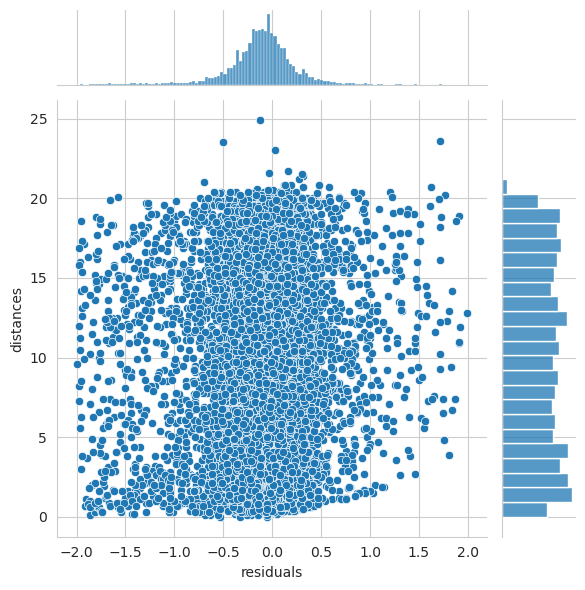

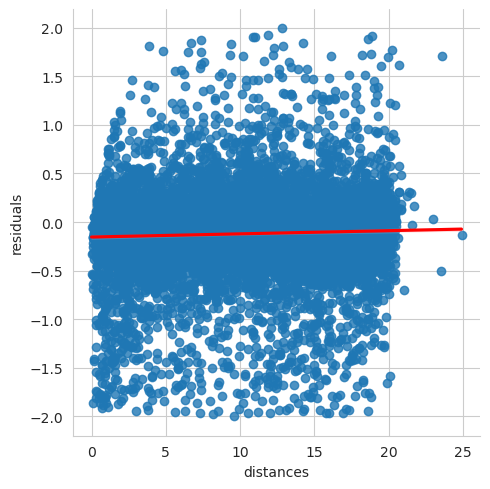

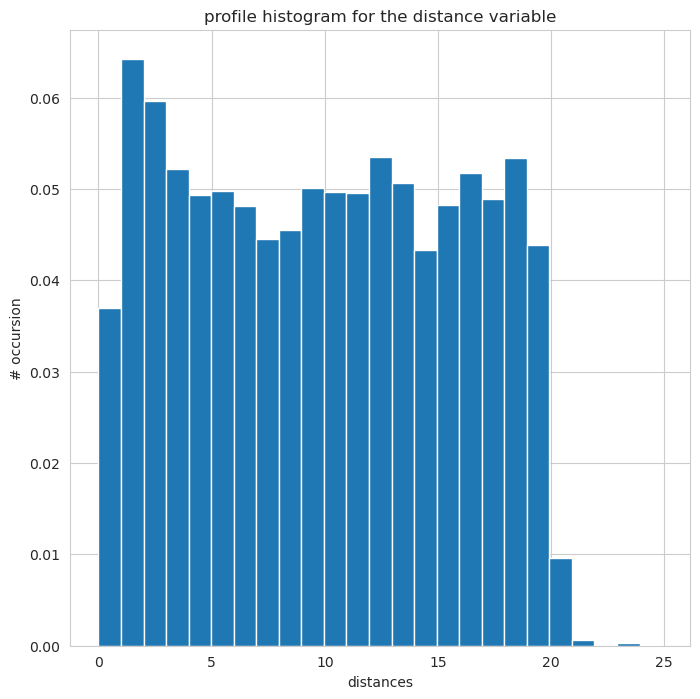

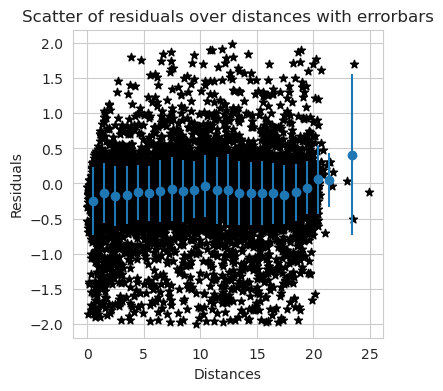

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import numpy.random as npr
import scipy

# Read the pkl file
data = pd.read_pickle('data/residuals_261.pkl').tolist()

# Convert to data Frame
df = pd.DataFrame(data)

# filter the entries (rows) with the absolute values of the variable "residual" smaller than 2
df = df[ abs(df['residuals']) < 2]
#print(df)

# print the seaborn
import seaborn as sns

sns.jointplot(x="residuals", y="distances", data = df)

# Linear regression
sns.set_style('whitegrid')
sns.lmplot(y ='residuals', x ='distances', data = df, line_kws={'color': 'red'})
plt.show()

# Create manually the profile histogram 
fig7 = plt.figure(num="Figure 7", figsize=(8, 8))
n, bins, _ = plt.hist(df['distances'], bins=25, density=True, cumulative=False)

plt.title('profile histogram for the distance variable')
plt.xlabel("distances")
plt.ylabel("# occursion")
plt.show()

x = np.fromfunction(lambda i, j: bins[i]+(bins[i+1]-bins[i])/2, (len(bins)-1, 1), dtype=int)

# define lamda functio for computing y
h_med = lambda i, j: df['residuals'].loc[(df['distances'] >= bins[i]) & (df['distances'] < bins[i+1])].mean()
h_std = lambda i, j: df['residuals'].loc[(df['distances'] >= bins[i]) & (df['distances'] < bins[i+1])].std()

# Compute the y using h_med function
y = np.zeros(len(bins)-1)
for i in range(len(bins)-1):
    y[i] = h_med(i, 0)


# Compute the y_err using h_std function
y_err = np.zeros(len(bins)-1)
for i in range(len(bins)-1):
    y_err[i] = h_std(i, 0)

fig8 = plt.figure(num="Figure 6", figsize=(4, 4))
plt.scatter(x=df['distances'],y=df['residuals'],marker='*',color='black')
plt.errorbar(x, y, yerr=y_err,fmt='o')
plt.xlabel('Distances')
plt.ylabel('Residuals')
plt.title('Scatter of residuals over distances with errorbars')
plt.show()



4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


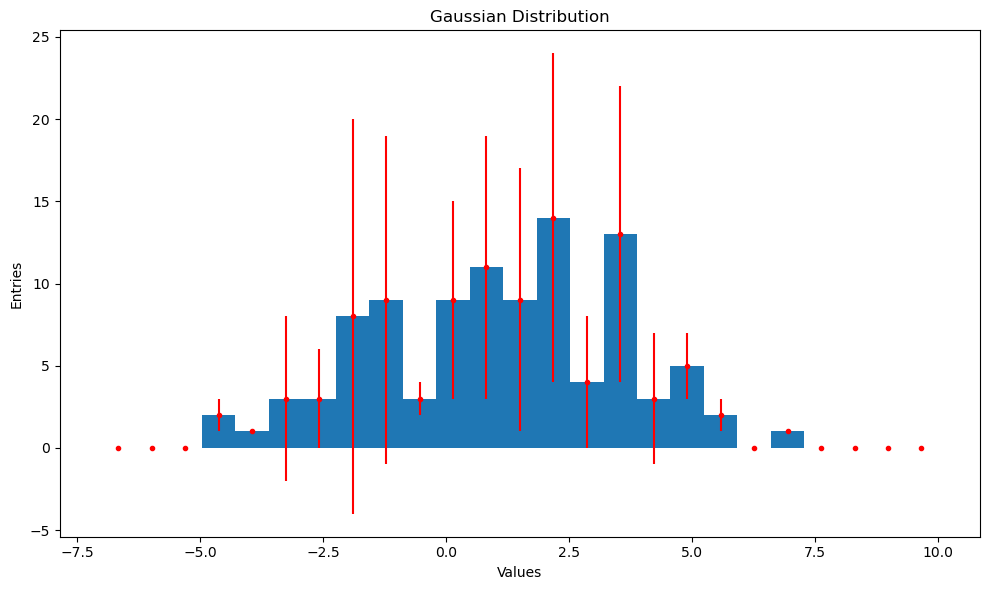

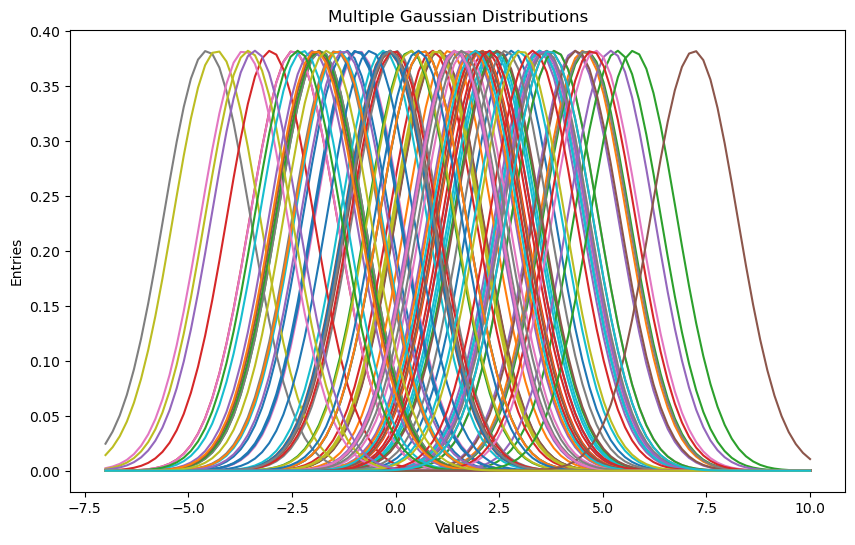

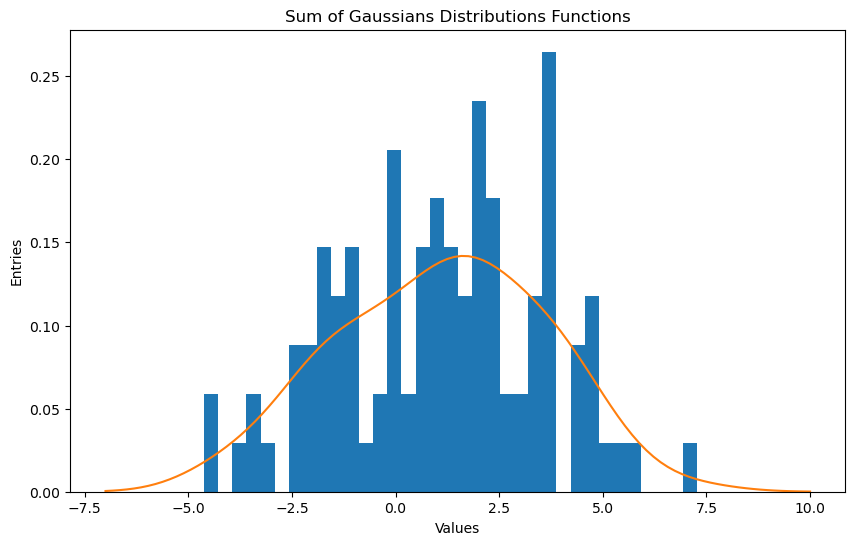

In [23]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import numpy.random as npr
import scipy
import scipy.stats

sd=3
mean = 2
N = 100
x = np.random.normal(loc = mean,scale = sd, size = N)

#Plotting the Histogram

fig = plt.figure(figsize=(10, 6)) 
entries, edges, _ = plt.hist(x, bins=25, range=(-7,10)) #i'm using a number of bins = 25
bin_centers = 0.5 * (edges[:-1] + edges[1:])
plt.errorbar(bin_centers, entries, yerr=np.random.poisson(entries,25), fmt='r.') #I also plot, beside the normal hist, the rappresentation with points and poisson uncertaintly
ax = fig.axes[0]
ax.set_title('Gaussian Distribution')
#setting the proper y label
ax.set_xlabel('Values')
ax.set_ylabel('Entries')
fig.tight_layout()
plt.show()

#Compute the standard deviation
cum=np.zeros(N)
a=[]
fig = plt.figure(figsize=(10, 6)) 
std=1.06*scipy.stats.tstd(x)*(N)**(-0.2)

#I'm plotting all the gaussian functions
for sd in x:
    t =np.linspace(-7, 10, 100)
    a.append(scipy.stats.norm.pdf(t,sd,std))
    plt.plot(t,a[-1])
    
ax = fig.axes[0]
ax.set_title('Multiple Gaussian Distributions')
ax.set_xlabel('Values')
ax.set_ylabel('Entries')
plt.show()

#Let's sum all the gaussian functions and normalize the results
for sd in a:
    for el in range(100):
        cum[el]= cum[el] + sd[el]

fig = plt.figure(figsize=(10, 6))
h, bins, _ = plt.hist(x, bins=50, range=(-7,10), density=True, cumulative=False)
plt.plot(t,cum/100) 
ax = fig.axes[0]
ax.set_title('Sum of Gaussians Distributions Functions')
ax.set_xlabel('Values')
ax.set_ylabel('Entries')
plt.show()